### Load libraries

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# setup graphic properties
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Dataset digits

In [52]:
digits_dataset = datasets.load_digits()

In [53]:
type(digits_dataset)

sklearn.utils._bunch.Bunch

In [54]:
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [55]:
digits_dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

### Infos about the dataset

In [56]:
print(digits_dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Some checks

In [57]:
print(digits_dataset.data.shape)
digits_dataset.data

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [58]:
print(digits_dataset.images.shape)
digits_dataset.images

(1797, 8, 8)


array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [59]:
print(digits_dataset.target.shape)
digits_dataset.target

(1797,)


array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

#### Export datasets

In [60]:
import os
PATH = r''

In [61]:
df_digits = pd.DataFrame(digits_dataset.data, columns=digits_dataset.feature_names)
df_digits.shape

(1797, 64)

In [62]:
df_target = pd.DataFrame(digits_dataset.target, columns=['target'])
df_target.shape

(1797, 1)

In [63]:
df_digits.to_csv(os.path.join(PATH, 'digits.csv'), index=None)
df_target.to_csv(os.path.join(PATH, 'target.csv'), index=None)

In [64]:
df_test = pd.read_csv('digits.csv')
df_test.shape

(1797, 64)

In [65]:
type(df_test.values)

numpy.ndarray

#### Define X and y

In [66]:
digits = digits_dataset.data
target = digits_dataset.target
images = digits_dataset.images

# input from csv
digits = df_digits.values
target = df_target.values
images = df_digits.values.reshape(df_digits.shape[0], 8, 8) 

### Print an example

<Figure size 640x480 with 0 Axes>

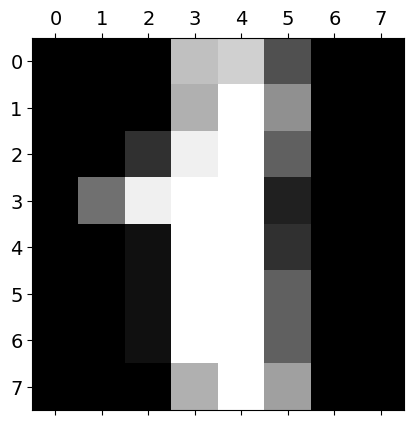

In [67]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(images[1])

### Define X_train, X_test, y_train, y_test

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    digits, target,
    test_size=0.33,
    random_state=42,
)

In [69]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (1203, 64)
X_test.shape: (594, 64)
y_train.shape: (1203, 1)
y_test.shape: (594, 1)


### Fit scaler

In [70]:
X_train.shape

(1203, 64)

In [71]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [72]:
scaler

StandardScaler()

### Normalize X_train

In [73]:
X_train_scaled = scaler.transform(X_train)

#### Training the model

In [74]:
X_train.shape

(1203, 64)

In [75]:
type(y_train)

numpy.ndarray

In [76]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train.ravel())

LogisticRegression()

#### Make predictions

In [77]:
pred_train = model.predict(X_train_scaled)
print(f'pred_train[:5]: {pred_train[:5]}')

pred_test = model.predict(X_test)
print(f'pred_test[:5]: {pred_test[:5]}')

pred_train[:5]: [1 1 8 9 3]
pred_test[:5]: [6 9 3 7 2]


In [78]:
pd.DataFrame(pred_train, columns=['y_pred'])


,y_pred
0,1
1,1
2,8
3,9
4,3
...,...
1198,3
1199,7
1200,2
1201,7


In [79]:
X_test[:3]

array([[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.],
       [ 0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 11., 13.,
         9.,  0.,  0.,  0.,  7., 16.,  0.,  9., 16.,  0.,  0.,  0.,  2.,
        15., 12., 16., 16.,  3.,  0.,  0.,  0.,  5.,  7.,  7., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  3.,  7.,
        16., 11.,  0.,  0.,  0.,  0., 13., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  8., 15., 12.,  4.,  0.,  0.,  0.,  5., 14.,  4., 11.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,
         2., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  

In [80]:
y_test.ravel()[:3]

array([6, 9, 3])

In [81]:
# check
assert len(y_train) == len(pred_train), '[assertion error] len(y_train) != len(pred_train)'
assert len(y_test) == len(pred_test), '[assertion error] len(y_test) != len(pred_test)'

### Performance metrics

In [82]:
print(f'Report of predictions on training set\n\n{classification_report(y_train, pred_train)}\n')

Report of predictions on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00       125
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       117
           5       1.00      1.00      1.00       109
           6       1.00      1.00      1.00       124
           7       1.00      1.00      1.00       117
           8       1.00      0.99      1.00       122
           9       1.00      1.00      1.00       112

    accuracy                           1.00      1203
   macro avg       1.00      1.00      1.00      1203
weighted avg       1.00      1.00      1.00      1203




In [83]:
print(f'Report of predictions on test set\n\n{classification_report(y_test, pred_test)}\n')

Report of predictions on test set

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.55      1.00      0.71        55
           2       0.96      0.90      0.93        52
           3       1.00      0.91      0.95        56
           4       1.00      0.25      0.40        64
           5       0.93      0.92      0.92        73
           6       0.86      0.98      0.92        57
           7       0.94      0.97      0.95        62
           8       0.89      0.90      0.90        52
           9       0.86      0.93      0.89        68

    accuracy                           0.86       594
   macro avg       0.90      0.87      0.85       594
weighted avg       0.90      0.86      0.85       594




### Visualize some predictions

In [84]:
import random

157


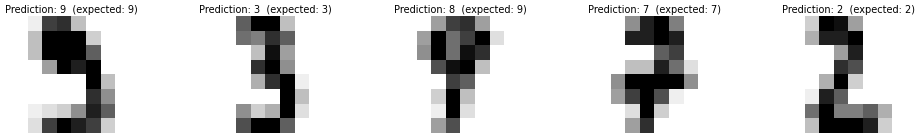

In [85]:
n_cols = 5
_, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(20, 3), dpi=50)

n_random = random.randint(0, len(pred_test))
print(n_random)
for ax, img, pred, target_y in zip(axes,
                                   X_test[n_random:n_random+n_cols], 
                                   pred_test[n_random:n_random+n_cols],
                                   y_test[n_random:n_random+n_cols]):
    ax.imshow(img.reshape(8, 8), cmap='binary')
    ax.set_title(f'Prediction: {pred}  (expected: {target_y[0]})')
    ax.set_axis_off()

plt.tight_layout()
plt.show()
plt.savefig('grid_image.png', dpi=300)  # Saves as PNG with 300 dpi
plt.close()

In [86]:
plt.show()

In [87]:
x_test = X_test.copy()
y_pred_test = pred_test.copy()

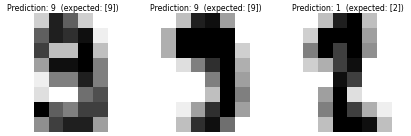

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5), dpi=40)
n_random = random.randint(0, len(y_pred_test))
img1 = x_test[n_random]
pred1 = y_pred_test[n_random]
target_y1 = y_test[n_random]
ax1.imshow(img1.reshape(8, 8), cmap='binary')
ax1.set_title(f'Prediction: {pred1}  (expected: {target_y1})')
ax1.set_axis_off()

n_random = random.randint(0, len(y_pred_test))
img2 = x_test[n_random]
pred2 = y_pred_test[n_random]
target_y2 = y_test[n_random]
ax2.imshow(img2.reshape(8, 8), cmap='binary')
ax2.set_title(f'Prediction: {pred2}  (expected: {target_y2})')
ax2.set_axis_off()

n_random = random.randint(0, len(y_pred_test))
img3 = x_test[n_random]
pred3 = y_pred_test[n_random]
target_y3 = y_test[n_random]
ax3.imshow(img3.reshape(8, 8), cmap='binary')
ax3.set_title(f'Prediction: {pred3}  (expected: {target_y3})')
ax3.set_axis_off()

In [89]:
x_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [90]:
y_pred_test[0]

np.int64(6)

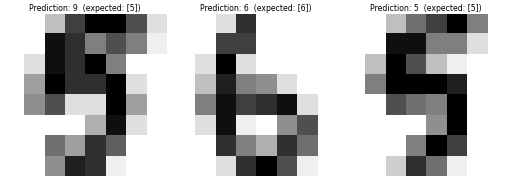

In [91]:
fig = plt.figure(figsize=(13, 5), dpi=40)
n_random = random.randint(0, len(y_pred_test))
img1 = x_test[n_random]
pred1 = y_pred_test[n_random]
target_y1 = y_test[n_random]
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img1.reshape(8, 8), cmap='binary')
ax1.set_title(f'Prediction: {pred1}  (expected: {target_y1})')

n_random = random.randint(0, len(y_pred_test))
img2 = x_test[n_random]
pred2 = y_pred_test[n_random]
target_y2 = y_test[n_random]
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img2.reshape(8, 8), cmap='binary')
ax2.set_title(f'Prediction: {pred2}  (expected: {target_y2})')

n_random = random.randint(0, len(y_pred_test))
img3 = x_test[n_random]
pred3 = y_pred_test[n_random]
target_y3 = y_test[n_random]
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img3.reshape(8, 8), cmap='binary')
ax3.set_title(f'Prediction: {pred3}  (expected: {target_y3})')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
plt.tight_layout()

plt.show()